In [30]:
# Imports
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt

In [31]:

def randcoefs(i,j):
    up=randomgrid[2*i,j+1]
    down=randomgrid[2*i+2,j+1]
    left=randomgrid[2*i+1,j-1]
    right=randomgrid[2*i+1,j+1]
    return (up,left,down,right)
def updaterand(i,j):
    #gives updated value of i,j point
    up=grid[i-1,j]
    left=grid[i,j-1]
    down=grid[i+1,j]
    right=grid[i,j+1]
    co=randcoefs(i,j)
    '''
    b=(
        co[1]*co[2]*co[3]
    +co[0]*co[2]*co[3]
    +co[0]*co[1]*co[3]
    +co[0]*co[1]*co[2]
    )
    '''

    val=(
        up*co[1]*co[2]*co[3]
        +left*co[0]*co[2]*co[3]
        +down*co[0]*co[1]*co[3]
        +right*co[0]*co[1]*co[2]
    )/(
        co[1]*co[2]*co[3]
        +co[0]*co[2]*co[3]
        +co[0]*co[1]*co[3]
        +co[0]*co[1]*co[2]
        )

    return val
def centralize(center,centerindex,grid,strength=5):

    grid[center+centerindex[0]:center+centerindex[-1],center+centerindex[0]:center+centerindex[-1]]=strength
    return grid
#random case
np.random.seed(0)
p = np.array([0.3,0.3,0.4])
def choose():
    #2 and 1 are conductivity
    return np.random.choice([1,5,9], p = p.ravel())


In [32]:
# Global Settings

# Dimension of simulation
# We assume two material exists, one with resistance 1, another decided by variable res_2
dim=101
res_2=100
centersize=int(dim/5)
num_iter=3000

grid=np.zeros((dim,dim))
center=int((dim-1)/2)
centerindex=[i-int(centersize/2) for i in range(centersize)]

In [33]:
# Global Settings

# Dimension of simulation

randomgrid=np.zeros((2*dim+1,dim+1))
for i in range(2*dim+1):
    for j in range(dim+1):
        randomgrid[i,j]=choose()
#print(randomgrid)

In [34]:

grid=np.zeros((dim,dim))
#print(grid)
center=int((dim-1)/2)
grid[center,center]=1
newgrid=deepcopy(grid)
for time in range(num_iter):
    for i in range(1,dim-1):
        for j in range(1,dim-1):
            newgrid[i,j]=updaterand(i,j)
    newgrid=centralize(center,centerindex,newgrid)
    grid=deepcopy(newgrid)
    #print(time)
#print(grid)




#a=[i for i in range(dim)]
#x,y=np.meshgrid(a,a)
#plt.matshow(grid, cmap=plt.cm.gray)
#plt.show()

x_values = np.linspace(0,10,100)
y_values = np.linspace(0,10,100)
x, y = np.meshgrid(x_values, y_values)

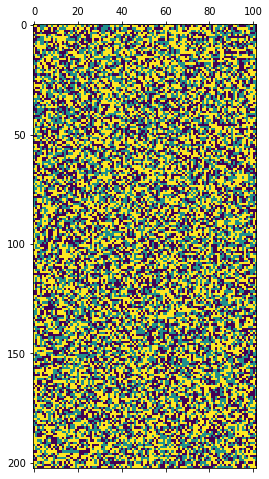

In [41]:
plt.matshow(randomgrid)
plt.savefig("R_159_D.png",bbox_inches="tight")

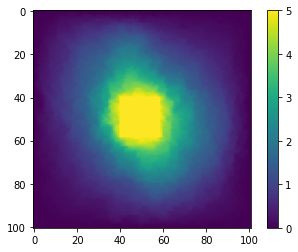

In [42]:
plt.imshow(grid)
plt.colorbar()
plt.savefig("R_159_BAR.png",bbox_inches="tight")

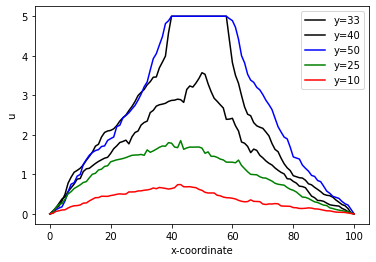

In [43]:
plt.xlabel('x-coordinate')
plt.ylabel('u')

plt.plot(grid[:,int(dim/3)],color='black',label='y=33')
plt.plot(grid[:,int(dim/2-dim/10)],color='black',label='y=40')
plt.plot(grid[:,int(dim/2)],color='blue',label='y=50')
plt.plot(grid[:,int(dim/4)],color='green',label='y=25')
plt.plot(grid[:,int(dim/10)],color='red',label='y=10')
plt.legend()
plt.savefig("R_159_A.png",bbox_inches="tight")

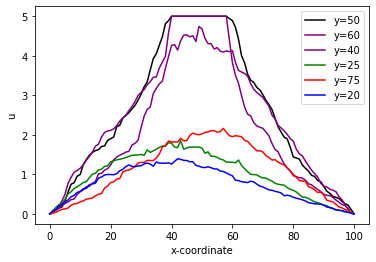

In [44]:
plt.xlabel('x-coordinate')
plt.ylabel('u')
a,b,c,d,e,f=int(dim/2),int(dim/2+10),int(dim/2-10),int(dim/4),int(3*dim/4),int(dim/5)
plt.plot(grid[:,a],color='black',label=f'y={a}')
plt.plot(grid[:,b],color='purple',label=f'y={b}')
plt.plot(grid[:,c],color='purple',label=f'y={c}')
plt.plot(grid[:,d],color='green',label=f'y={d}')
plt.plot(grid[:,e],color='red',label=f'y={e}')
plt.plot(grid[:,f],color='blue',label=f'y={f}')
plt.legend()
plt.savefig("R_159_B.png",bbox_inches="tight")

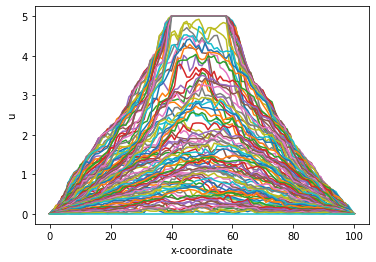

In [45]:
plt.xlabel('x-coordinate')
plt.ylabel('u')
precision=dim
lx=[int(dim/precision*i) for i in range(1, precision)]
for i in lx:
    plt.plot(grid[:,i],label=f'y={i}')
#plt.legend()
plt.savefig("R_159_CRAZY.png",bbox_inches="tight")

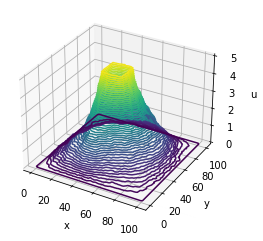

In [46]:
def f(x, y):

    return grid[int(x)][int(y)]

x = np.linspace(0, dim, dim)
y = x

X, Y = np.meshgrid(x, y)
Z = grid
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50,)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u');
plt.savefig("R_159_3D.png",bbox_inches="tight")

# Discussion on plots
The graph indicates that the voltage distribution has no or "very weak" relation with direction, which means we can treat this composites as isotopic. This matches with the intuition that the different resistors are randomly distributed.

To illustrate this we can compare this result to one obtained in two-material case with regular microscopic structure. Isotropicity is shown as no microscopic structure apart from random distribution is enabled in this simulation.

It is possible to use this method to study the case for more complex composites.